# Chapter 02 Applied Exercises

8. This exercise relates to the College data set, which can be found in the file College.csv on the book website. It contains a number of variables for 777 different universities and colleges in the US.

- Use the pd.read_csv() function to read the data into Python. Call the loaded data college. Make sure that you have the directory set to the correct location for the data

In [2]:
import pandas as pd
data = pd.read_csv('datasets/College.csv')
data.head

<bound method NDFrame.head of                          Unnamed: 0 Private   Apps  Accept  Enroll  Top10perc  \
0      Abilene Christian University     Yes   1660    1232     721         23   
1                Adelphi University     Yes   2186    1924     512         16   
2                    Adrian College     Yes   1428    1097     336         22   
3               Agnes Scott College     Yes    417     349     137         60   
4         Alaska Pacific University     Yes    193     146      55         16   
..                              ...     ...    ...     ...     ...        ...   
772         Worcester State College      No   2197    1515     543          4   
773               Xavier University     Yes   1959    1805     695         24   
774  Xavier University of Louisiana     Yes   2097    1915     695         34   
775                 Yale University     Yes  10705    2453    1317         95   
776    York College of Pennsylvania     Yes   2989    1855     691         28  

- Look at the data used in the notebook by creating and running a new cell with just the code college in it. You should notice that the first column is just the name of each university in a column named something like Unnamed: 0. We don’t really want pandas to treat this as data. However, it may be handy to have these names for later

In [3]:
data2 = pd.read_csv('datasets/College.csv', index_col=0)
data3 = data.rename({'Unnamed: 0' : 'College'}, axis = 1)
data3 = data3.set_index('College')
data = data3

- Use the describe() method of to produce a numerical summary of the variables in the data set

In [4]:
data.describe()

,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate
count,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.00000
mean,3001.638353,2018.804376,779.972973,27.558559,55.796654,3699.907336,855.298584,10440.669241,4357.526384,549.380952,1340.642214,72.660232,79.702703,14.089704,22.743887,9660.171171,65.46332
std,3870.201484,2451.113971,929.176190,17.640364,19.804778,4850.420531,1522.431887,4023.016484,1096.696416,165.105360,677.071454,16.328155,14.722359,3.958349,12.391801,5221.768440,17.17771
min,81.000000,72.000000,35.000000,1.000000,9.000000,139.000000,1.000000,2340.000000,1780.000000,96.000000,250.000000,8.000000,24.000000,2.500000,0.000000,3186.000000,10.00000
25%,776.000000,604.000000,242.000000,15.000000,41.000000,992.000000,95.000000,7320.000000,3597.000000,470.000000,850.000000,62.000000,71.000000,11.500000,13.000000,6751.000000,53.00000
50%,1558.000000,1110.000000,434.000000,23.000000,54.000000,1707.000000,353.000000,9990.000000,4200.000000,500.000000,1200.000000,75.000000,82.000000,13.600000,21.000000,8377.000000,65.00000
75%,3624.000000,2424.000000,902.000000,35.000000,69.000000,4005.000000,967.000000,12925.000000,5050.000000,600.000000,1700.000000,85.000000,92.000000,16.500000,31.000000,10830.000000,78.00000
max,48094.000000,26330.000000,6392.000000,96.000000,100.000000,31643.000000,21836.000000,21700.000000,8124.000000,2340.000000,6800.000000,103.000000,100.000000,39.800000,64.000000,56233.000000,118.00000


- Use the pd.plotting.scatter_matrix() function to produce a scatterplot matrix of the first columns [Top10perc, Apps, Enroll].
Recall that you can reference a list C of columns of a data frame A using A[C]

array([[<Axes: xlabel='Top10perc', ylabel='Top10perc'>,
        <Axes: xlabel='Apps', ylabel='Top10perc'>,
        <Axes: xlabel='Enroll', ylabel='Top10perc'>],
       [<Axes: xlabel='Top10perc', ylabel='Apps'>,
        <Axes: xlabel='Apps', ylabel='Apps'>,
        <Axes: xlabel='Enroll', ylabel='Apps'>],
       [<Axes: xlabel='Top10perc', ylabel='Enroll'>,
        <Axes: xlabel='Apps', ylabel='Enroll'>,
        <Axes: xlabel='Enroll', ylabel='Enroll'>]], dtype=object)

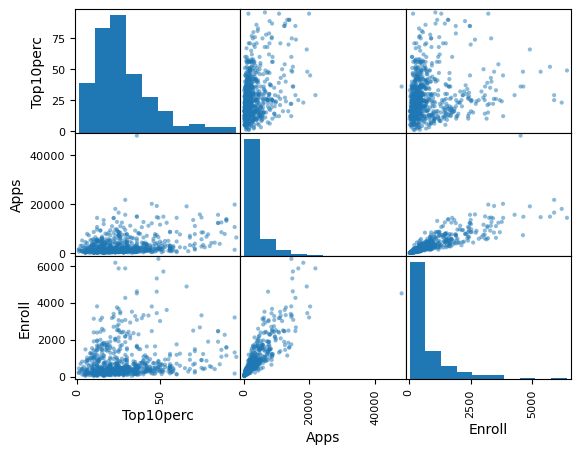

In [5]:
pd.plotting.scatter_matrix(data[['Top10perc', 'Apps', 'Enroll']])

- Use the boxplot() method of college to produce side-by-side boxplots of Outstate versus Private

<Axes: title={'center': 'Outstate'}, xlabel='Private'>

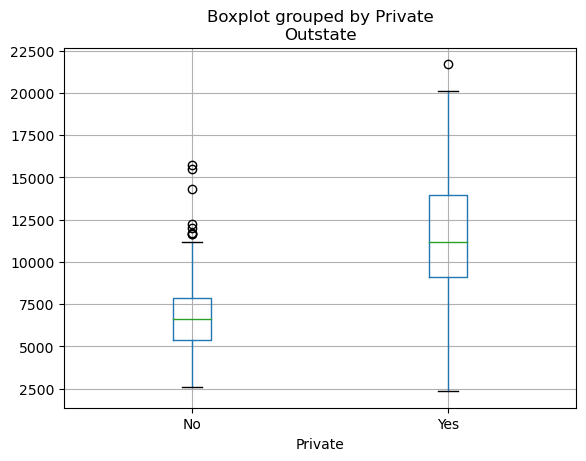

In [9]:
data.boxplot('Outstate', by= 'Private')

- Create a new qualitative variable, called Elite, by binning the Top10perc variable into two groups based on whether or not the proportion of students coming from the top 10% of their high school classes exceeds 50%

In [32]:
data['Elite'] = pd.cut(data['Top10perc'], bins=[0, 50, 100], labels=['No', 'Yes'])

- Use the value_counts() method of college['Elite'] to see how many elite universities there are. Finally, use the boxplot() method again to produce side-by-side boxplots of Outstate versus Elite.

In [33]:
data.Elite.value_counts()

Top10perc
Yes    3
No     0
Name: count, dtype: int64

<Axes: title={'center': 'Outstate'}, xlabel='Elite'>

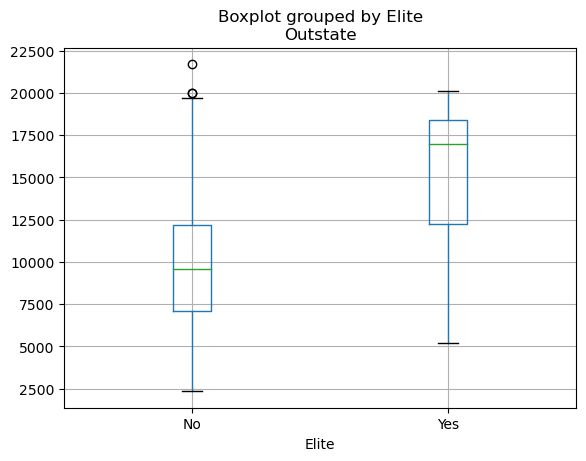

In [34]:
data.boxplot('Outstate', by='Elite')

- Use the plot.hist() method of college to produce some histograms with differing numbers of bins for a few of the quantitative variables. The command plt.subplots(2, 2) may be useful: it will divide the plot window into four regions so that four plots can be made simultaneously. By changing the arguments you can divide the screen up in other combinations.

array([<Axes: title={'center': 'PhD'}>], dtype=object)

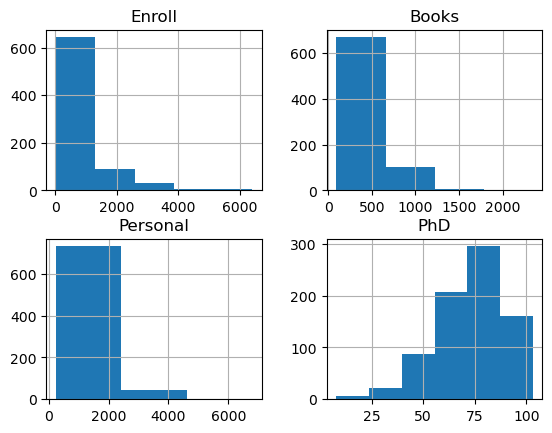

In [37]:
from matplotlib.pyplot import subplots

fig, ax = subplots(2,2)

data.hist('Enroll', bins= 5, ax = ax[0,0])
data.hist('Books', bins= 4, ax = ax[0,1])
data.hist('Personal', bins= 3, ax = ax[1,0])
data.hist('PhD', bins= 6, ax = ax[1,1])

9. This exercise involves the Auto data set studied in the lab. Make sure that the missing values have been removed from the data

- Which of the predictors are quantitative, and which are qualitative

In [1]:
import pandas as pd

auto = pd.read_csv('Auto.csv', na_values=['?']).dropna()

In [8]:
auto.head

<bound method NDFrame.head of       mpg  cylinders  displacement  horsepower  weight  acceleration  year  \
0    18.0          8         307.0         130    3504          12.0    70   
1    15.0          8         350.0         165    3693          11.5    70   
2    18.0          8         318.0         150    3436          11.0    70   
3    16.0          8         304.0         150    3433          12.0    70   
4    17.0          8         302.0         140    3449          10.5    70   
..    ...        ...           ...         ...     ...           ...   ...   
387  27.0          4         140.0          86    2790          15.6    82   
388  44.0          4          97.0          52    2130          24.6    82   
389  32.0          4         135.0          84    2295          11.6    82   
390  28.0          4         120.0          79    2625          18.6    82   
391  31.0          4         119.0          82    2720          19.4    82   

     origin                      

In [6]:
for column in auto.columns:
    msg = 'The type of {} is {}.'.format(column, auto[column].dtype)
    print(msg)
    

The type of mpg is float64.
The type of cylinders is int64.
The type of displacement is float64.
The type of horsepower is int64.
The type of weight is int64.
The type of acceleration is float64.
The type of year is int64.
The type of origin is int64.
The type of name is object.


In [7]:
auto.dtypes

mpg             float64
cylinders         int64
displacement    float64
horsepower        int64
weight            int64
acceleration    float64
year              int64
origin            int64
name             object
dtype: object

- What is the range of each quantitative predictor? You can answer this using the min() and max() methods in numpy.

In [9]:
auto.describe()

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin
count,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000
mean,23.445918,5.471939,194.411990,104.469388,2977.584184,15.541327,75.979592,1.576531
std,7.805007,1.705783,104.644004,38.491160,849.402560,2.758864,3.683737,0.805518
min,9.000000,3.000000,68.000000,46.000000,1613.000000,8.000000,70.000000,1.000000
25%,17.000000,4.000000,105.000000,75.000000,2225.250000,13.775000,73.000000,1.000000
50%,22.750000,4.000000,151.000000,93.500000,2803.500000,15.500000,76.000000,1.000000
75%,29.000000,8.000000,275.750000,126.000000,3614.750000,17.025000,79.000000,2.000000
max,46.600000,8.000000,455.000000,230.000000,5140.000000,24.800000,82.000000,3.000000


- Now remove the 10th through 85th observations. What is the range, mean, and standard deviation of each predictor in the subset of the data that remains?

In [15]:
import numpy as np

auto_droped = auto.drop(index=np.arange(10,86))

In [16]:
auto_droped.describe()

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin
count,316.000000,316.000000,316.000000,316.000000,316.00000,316.000000,316.000000,316.000000
mean,24.407595,5.373418,187.512658,100.848101,2936.53481,15.717405,77.136076,1.601266
std,7.863285,1.654179,100.114616,35.954147,811.87445,2.713876,3.123464,0.819910
min,11.000000,3.000000,68.000000,46.000000,1649.00000,8.500000,70.000000,1.000000
25%,18.000000,4.000000,100.250000,75.000000,2213.75000,14.000000,75.000000,1.000000
50%,23.950000,4.000000,145.500000,90.000000,2792.50000,15.500000,77.000000,1.000000
75%,30.550000,6.000000,250.000000,115.000000,3508.00000,17.300000,80.000000,2.000000
max,46.600000,8.000000,455.000000,230.000000,4997.00000,24.800000,82.000000,3.000000


- Using the full data set, investigate the predictors graphically, using scatterplots or other tools of your choice. Create some plots highlighting the relationships among the predictors. Comment on your findings

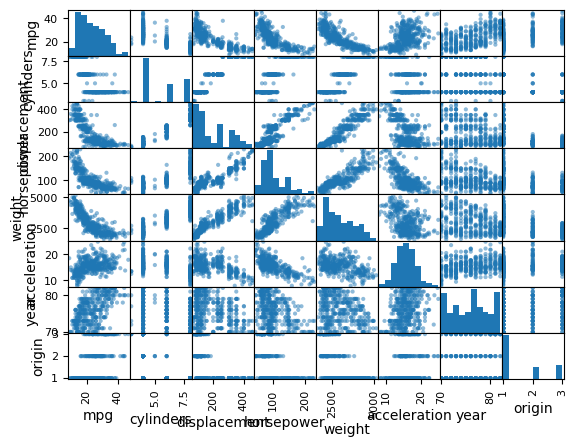

In [17]:
pd.plotting.scatter_matrix(auto);

- Suppose that we wish to predict gas mileage (mpg) on the basis of the other variables. Do your plots suggest that any of the other variables might be useful in predicting mpg? Justify your answer

Displacement, horsepower, weight and acceleration

10. This exercise involves the Boston housing data set

- To begin, load in the Boston data set, which is part of the ISLP library

In [18]:
import pandas as pd
import numpy as np

house = pd.read_csv('datasets/Boston.csv')
house.head

<bound method NDFrame.head of      Unnamed: 0     crim    zn  indus  chas    nox     rm   age     dis  rad  \
0             1  0.00632  18.0   2.31     0  0.538  6.575  65.2  4.0900    1   
1             2  0.02731   0.0   7.07     0  0.469  6.421  78.9  4.9671    2   
2             3  0.02729   0.0   7.07     0  0.469  7.185  61.1  4.9671    2   
3             4  0.03237   0.0   2.18     0  0.458  6.998  45.8  6.0622    3   
4             5  0.06905   0.0   2.18     0  0.458  7.147  54.2  6.0622    3   
..          ...      ...   ...    ...   ...    ...    ...   ...     ...  ...   
501         502  0.06263   0.0  11.93     0  0.573  6.593  69.1  2.4786    1   
502         503  0.04527   0.0  11.93     0  0.573  6.120  76.7  2.2875    1   
503         504  0.06076   0.0  11.93     0  0.573  6.976  91.0  2.1675    1   
504         505  0.10959   0.0  11.93     0  0.573  6.794  89.3  2.3889    1   
505         506  0.04741   0.0  11.93     0  0.573  6.030  80.8  2.5050    1   

     tax 

- How many rows are in this data set? How many columns? What do the rows and columns represent?

There are 14 attributes in each case of the dataset. They are:  
CRIM - per capita crime rate by town  
ZN - proportion of residential land zoned for lots over 25,000 sq.ft.  
INDUS - proportion of non-retail business acres per town.  
CHAS - Charles River dummy variable (1 if tract bounds river; 0 otherwise)  
NOX - nitric oxides concentration (parts per 10 million)  
RM - average number of rooms per dwelling  
AGE - proportion of owner-occupied units built prior to 1940  
DIS - weighted distances to five Boston employment centres  
RAD - index of accessibility to radial highways  
TAX - full-value property-tax rate per $10,000  
PTRATIO - pupil-teacher ratio by town  
B - 1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town  
LSTAT - % lower status of the population  
MEDV - Median value of owner-occupied homes in $1000's  

In [19]:
print(house.columns)

Index(['Unnamed: 0', 'crim', 'zn', 'indus', 'chas', 'nox', 'rm', 'age', 'dis',
       'rad', 'tax', 'ptratio', 'lstat', 'medv'],
      dtype='object')


- Make some pairwise scatterplots of the predictors (columns) in this data set. Describe your findings

array([[<Axes: xlabel='Unnamed: 0', ylabel='Unnamed: 0'>,
        <Axes: xlabel='crim', ylabel='Unnamed: 0'>,
        <Axes: xlabel='zn', ylabel='Unnamed: 0'>,
        <Axes: xlabel='indus', ylabel='Unnamed: 0'>,
        <Axes: xlabel='chas', ylabel='Unnamed: 0'>,
        <Axes: xlabel='nox', ylabel='Unnamed: 0'>,
        <Axes: xlabel='rm', ylabel='Unnamed: 0'>,
        <Axes: xlabel='age', ylabel='Unnamed: 0'>,
        <Axes: xlabel='dis', ylabel='Unnamed: 0'>,
        <Axes: xlabel='rad', ylabel='Unnamed: 0'>,
        <Axes: xlabel='tax', ylabel='Unnamed: 0'>,
        <Axes: xlabel='ptratio', ylabel='Unnamed: 0'>,
        <Axes: xlabel='lstat', ylabel='Unnamed: 0'>,
        <Axes: xlabel='medv', ylabel='Unnamed: 0'>],
       [<Axes: xlabel='Unnamed: 0', ylabel='crim'>,
        <Axes: xlabel='crim', ylabel='crim'>,
        <Axes: xlabel='zn', ylabel='crim'>,
        <Axes: xlabel='indus', ylabel='crim'>,
        <Axes: xlabel='chas', ylabel='crim'>,
        <Axes: xlabel='nox', ylabe

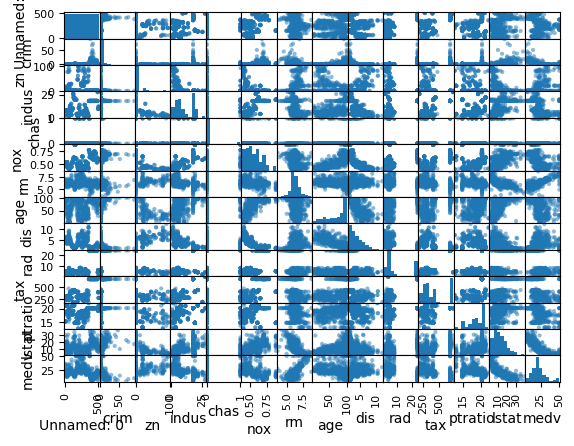

In [20]:
pd.plotting.scatter_matrix(house)

- Are any of the predictors associated with per capita crime rate? If so, explain the relationship

age, dist, mdev

- Do any of the suburbs of Boston appear to have particularly high crime rates? Tax rates? Pupil-teacher ratios? Comment on the range of each predictor

In [22]:
house.describe()

,Unnamed: 0,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,lstat,medv
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,253.500000,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,12.653063,22.532806
std,146.213884,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,7.141062,9.197104
min,1.000000,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,1.730000,5.000000
25%,127.250000,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,6.950000,17.025000
50%,253.500000,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,11.360000,21.200000
75%,379.750000,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,16.955000,25.000000
max,506.000000,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,37.970000,50.000000


In [23]:
house.loc[lambda df: df['crim'] > 3.7]

,Unnamed: 0,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,lstat,medv
143,144,4.09740,0.0,19.58,0,0.871,5.468,100.0,1.4118,5,403,14.7,26.42,15.6
356,357,8.98296,0.0,18.10,1,0.770,6.212,97.4,2.1222,24,666,20.2,17.60,17.8
357,358,3.84970,0.0,18.10,1,0.770,6.395,91.0,2.5052,24,666,20.2,13.27,21.7
358,359,5.20177,0.0,18.10,1,0.770,6.127,83.4,2.7227,24,666,20.2,11.48,22.7
359,360,4.26131,0.0,18.10,0,0.770,6.112,81.3,2.5091,24,666,20.2,12.67,22.6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
480,481,5.82401,0.0,18.10,0,0.532,6.242,64.7,3.4242,24,666,20.2,10.74,23.0
481,482,5.70818,0.0,18.10,0,0.532,6.750,74.9,3.3317,24,666,20.2,7.74,23.7
482,483,5.73116,0.0,18.10,0,0.532,7.061,77.0,3.4106,24,666,20.2,7.01,25.0
486,487,5.69175,0.0,18.10,0,0.583,6.114,79.8,3.5459,24,666,20.2,14.98,19.1


- How many of the suburbs in this data set bound the Charles river

In [26]:
house.loc[lambda df: df['chas'] == 1].count()

Unnamed: 0    35
crim          35
zn            35
indus         35
chas          35
nox           35
rm            35
age           35
dis           35
rad           35
tax           35
ptratio       35
lstat         35
medv          35
dtype: int64

- What is the median pupil-teacher ratio among the towns in this data set

In [27]:
house['ptratio'].median()

19.05

- Which suburb of Boston has lowest median value of owneroccupied homes? What are the values of the other predictors for that suburb, and how do those values compare to the overall ranges for those predictors? Comment on your finding

In [28]:
min = house['medv'].min()
house.loc[lambda df: df['medv'] == min]

,Unnamed: 0,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,lstat,medv
398,399,38.3518,0.0,18.1,0,0.693,5.453,100.0,1.4896,24,666,20.2,30.59,5.0
405,406,67.9208,0.0,18.1,0,0.693,5.683,100.0,1.4254,24,666,20.2,22.98,5.0


In [29]:
house['medv'].argmin()

398

In [30]:
house.iloc[398]

Unnamed: 0    399.0000
crim           38.3518
zn              0.0000
indus          18.1000
chas            0.0000
nox             0.6930
rm              5.4530
age           100.0000
dis             1.4896
rad            24.0000
tax           666.0000
ptratio        20.2000
lstat          30.5900
medv            5.0000
Name: 398, dtype: float64

- In this data set, how many of the suburbs average more than seven rooms per dwelling? More than eight rooms per dwelling? Comment on the suburbs that average more than eight rooms per dwelling

In [31]:
house.loc[lambda df: df['rm'] > 7].count()

Unnamed: 0    64
crim          64
zn            64
indus         64
chas          64
nox           64
rm            64
age           64
dis           64
rad           64
tax           64
ptratio       64
lstat         64
medv          64
dtype: int64

In [32]:
house.loc[lambda df: df['rm'] > 8].count()

Unnamed: 0    13
crim          13
zn            13
indus         13
chas          13
nox           13
rm            13
age           13
dis           13
rad           13
tax           13
ptratio       13
lstat         13
medv          13
dtype: int64

In [33]:
house.loc[lambda df: df['rm'] > 8]

,Unnamed: 0,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,lstat,medv
97,98,0.12083,0.0,2.89,0,0.4450,8.069,76.0,3.4952,2,276,18.0,4.21,38.7
163,164,1.51902,0.0,19.58,1,0.6050,8.375,93.9,2.1620,5,403,14.7,3.32,50.0
204,205,0.02009,95.0,2.68,0,0.4161,8.034,31.9,5.1180,4,224,14.7,2.88,50.0
224,225,0.31533,0.0,6.20,0,0.5040,8.266,78.3,2.8944,8,307,17.4,4.14,44.8
225,226,0.52693,0.0,6.20,0,0.5040,8.725,83.0,2.8944,8,307,17.4,4.63,50.0
226,227,0.38214,0.0,6.20,0,0.5040,8.040,86.5,3.2157,8,307,17.4,3.13,37.6
232,233,0.57529,0.0,6.20,0,0.5070,8.337,73.3,3.8384,8,307,17.4,2.47,41.7
233,234,0.33147,0.0,6.20,0,0.5070,8.247,70.4,3.6519,8,307,17.4,3.95,48.3
253,254,0.36894,22.0,5.86,0,0.4310,8.259,8.4,8.9067,7,330,19.1,3.54,42.8
257,258,0.61154,20.0,3.97,0,0.6470,8.704,86.9,1.8010,5,264,13.0,5.12,50.0
